In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}<style>"))

# fit three kinds of line
- 1：一条直线（一次函数拟合并延长）
- 2：一条曲线（按X轴取像素中心拟合）
- 3：Y型线&顶部粘住的两条线（分两条按X轴取像素中心拟合

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import cv2
import math
import tensorflow as tf
import keras.backend as K
from keras.models import load_model, Sequential, model_from_json
import random
from sklearn.cluster import DBSCAN
import os

from keras import layers
from keras.layers import *
from keras.layers.pooling import MaxPool2D, AveragePooling2D
from keras.optimizers import Adam

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

TIMEFORMAT = "%m-%d-%H:%M:%S"
GPU_MEMORY_FRACTION = 1.0
DATA_SHAPE = 224

def config_keras_backend(fraction):
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.gpu_options.per_process_gpu_memory_fraction = fraction
    sess = tf.Session(config=config)
    K.set_session(sess)

config_keras_backend(GPU_MEMORY_FRACTION)

## begin

In [3]:
def line2img(line, shape):
    x_list = line[:, 0]
    y_list = line[:, 1]
    x_range = x_list.max() - x_list.min() + 1
    y_range = y_list.max() - y_list.min() + 1
    x_list = x_list - x_list.min()
    y_list = y_list - y_list.min()
    pic = np.zeros((x_range, y_range), np.uint8)
    for x, y in zip(x_list, y_list):
        pic[x, y] = 255
    img = cv2.resize(pic ,(shape, shape))
    return img

In [40]:
# def cluster_result_classifier(cluster, model):
#     result = []
#     # print cluster.shape[0]
#     for i in range(cluster.shape[0]):
#         img = line2img(cluster[i], 32)
#         plt.imshow(img)
#         img = img.reshape(1, 32, 32, 1)
#         temp = model.predict(img)
#         classification_result = temp.argmax()
#         print classification_result
#         result.append(classification_result)
#     return result

In [97]:
def format_data(data):
    for index in range(data.shape[0]):
        for i in range(data.shape[1]):
            for j in range(data.shape[2]):
                if data[index][i][j] != 0:
                    data[index][i][j] = 255
    return data

In [128]:
def cluster_result_classifier(cluster, model):
    result = []
    img = line2img(cluster, 32)
    img = format_data(img.reshape(1, 32, 32))
    plt.imshow(img[0], cmap='gray')
    plt.show()
    img = img.reshape(1, 32, 32, 1)
    temp = model.predict(img)
    classification_result = temp.argmax()
    print classification_result
    result.append(classification_result)
    return result

In [208]:
val_image = np.load("/home/mc16/result/val_cluster_06-18-05:50:42.npy")
model = load_model('/home/mc16/zhy/Classification_Model/classifier_4.h5')

387


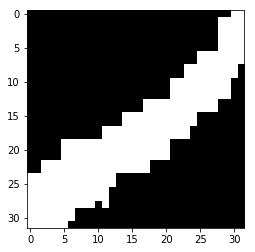

0


[0]

In [242]:
index = random.randint(0, len(val_image))
print index
cluster = val_image[index][0][0]
cluster_result_classifier(cluster, model)